In [ ]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [ ]:
# Load the mandrill image as an NxNx3 array. Values range from 0.0 to 255.0.
mandrill = plt.imread('mandrill.png')[:, :, :3].astype(float)
print(mandrill.shape)
N = int(mandrill.shape[0])
print(N**2/4)
M = 2
k = 64

(512, 512, 3)
65536.0


In [ ]:
# Store each MxM block of the image as a row vector of X
X = np.zeros((N**2//M**2, 3*M**2))
for i in range(N//M):
    for j in range(N//M):
        X[i*N//M+j, :] = mandrill[i*M:(i+1)*M, j*M:(j+1)*M, :].reshape(3*M**2)


In [ ]:
print(X.shape)


(65536, 12)


In [ ]:
#generate random cluster means
cluster_means = np.random.rand(k,3*M**2)
objective_func = list()
for _ in range(20):
  #calculate distance from clusters and assign each vector to its closest cluster
  nearest_cluster = np.zeros(N**2//M**2)
  current_objective_func = 0
  for i in range(N**2//M**2):
    cluster_distances = np.zeros(k)
    for j in range(k):
      cluster_distances[j] = np.linalg.norm(X[i] - cluster_means[j])
    min = cluster_distances.min()
    nearest_cluster[i] = np.where(cluster_distances == min)[0]
    #calculate objective function
    current_objective_func+=min**2

  objective_func.append(current_objective_func)
  #calculate new cluster means
  new_cluster_means = np.zeros((k,3*M**2))
  for cluster in range(k):
    vector_count = 0
    for vector in range(N**2//M**2):
      if (int(nearest_cluster[vector]) == cluster):
        vector_count+=1
        new_cluster_means[cluster] += X[vector]
    if (vector_count != 0):
      new_cluster_means[cluster] /= vector_count
    else:
      new_cluster_means[cluster] = cluster_means[cluster]

  cluster_means = new_cluster_means



<ipython-input-132-9a72197c83e7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nearest_cluster[i] = np.where(cluster_distances == min)[0]


In [ ]:
#replace vectors with nearest cluster mean
new_X = np.zeros((N**2//M**2, 3*M**2))
#calculate distance from clusters and assign each vector to its closest cluster
for i in range(N**2//M**2):
  cluster_distances = np.zeros(k)
  for j in range(k):
    cluster_distances[j] = np.linalg.norm(X[i] - cluster_means[j])
  min = cluster_distances.min()
  nearest_cluster[i] = np.where(cluster_distances == min)[0]
  new_X[i] = cluster_means[int(nearest_cluster[i])]


<ipython-input-128-eb194d28b403>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nearest_cluster[i] = np.where(cluster_distances == min)[0]


In [ ]:
#convert 65536x12 vectors back into 512x512x3
reconstructed_image = np.zeros((N, N, 3))

for i in range(N//M):
    for j in range(N//M):
        reconstructed_image[i*M:(i+1)*M, j*M:(j+1)*M, :] = new_X[i*N//M+j, :].reshape(M, M, 3)


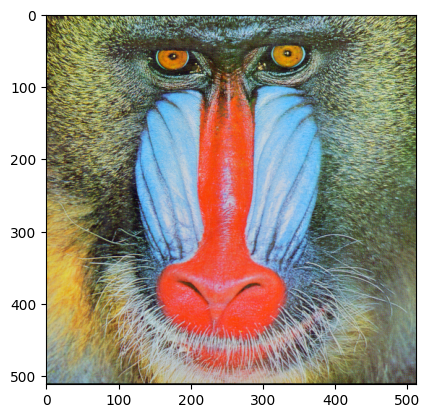

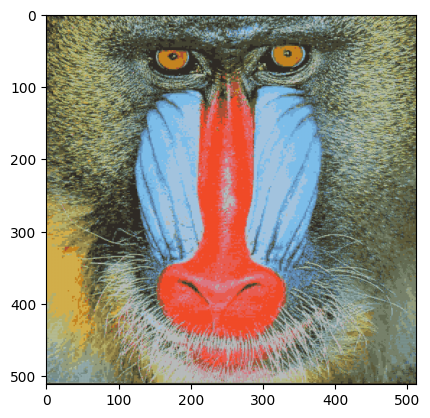

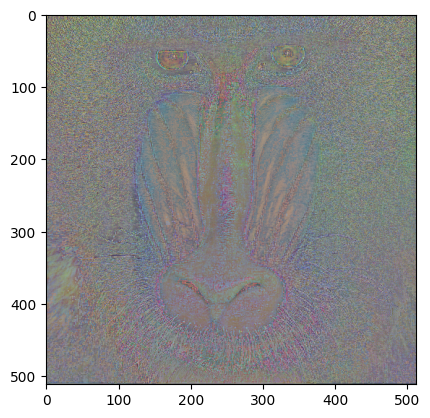

In [ ]:
plt.imshow(mandrill)
plt.show()
plt.imshow(reconstructed_image)
plt.show()
plt.imshow(mandrill - reconstructed_image  + .5)
plt.show()

48218.403110144485


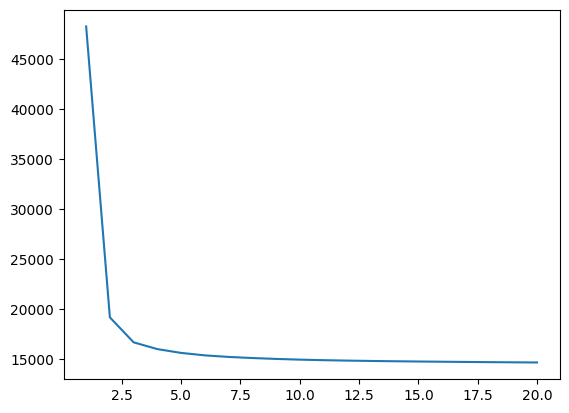

In [ ]:
#plot of objective function vs iterations
print(objective_func[0])
plt.plot(np.arange(20) + 1,objective_func)
plt.show()

In [ ]:
#Calculate RMAE
relative_mean_absolute_error = np.sum(np.abs(reconstructed_image - mandrill)) / (3 * N**2)
print("Relative Mean Absolute Error:", relative_mean_absolute_error)

Relative Mean Absolute Error: 0.0542640210141662
